<a href="https://colab.research.google.com/github/7Petrichor7/datathon_crime_clab/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
seattle_data = pd.read_csv('drive/MyDrive/Colab Notebooks/dataset/SPD_Crime_Data__2008-Present.csv')
seattle_filtered = seattle_data[["Offense Start DateTime", "Offense Parent Group", "Offense Code", "Beat"]]
seattle_filtered.head()

,Offense Start DateTime,Offense Parent Group,Offense Code,Beat
0,2/5/2020 10:10,DRUG/NARCOTIC OFFENSES,35A,Q1
1,2/3/2020 8:00,LARCENY-THEFT,23G,J3
2,2/2/2020 20:30,ROBBERY,120,U3
3,2/5/2020 1:17,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,290,Q1
4,2/5/2020 0:51,DRIVING UNDER THE INFLUENCE,90D,B2


In [ ]:
tacoma_data = pd.read_csv('Tacoma_Crime_Extract_(SS911).csv')
tacoma_filtered = tacoma_data[["crime", "occurred_on"]]
tacoma_filtered.head()

In [ ]:
print(seattle_filtered["Offense Start DateTime"].dtype)
time = seattle_filtered["Offense Start DateTime"]
seattle_filtered["Offense Start DateTime"] = seattle_filtered["Offense Start DateTime"].fillna("").astype(str)
seattle_filtered["Offense Start DateTime"] = seattle_filtered["Offense Start DateTime"].apply(lambda x: x.split()[0] if " " in x else x)
seattle_filtered["Exact time"] = None
seattle_filtered.head()

object


<ipython-input-14-e01736211fc7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seattle_filtered["Offense Start DateTime"] = seattle_filtered["Offense Start DateTime"].fillna("").astype(str)
<ipython-input-14-e01736211fc7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seattle_filtered["Offense Start DateTime"] = seattle_filtered["Offense Start DateTime"].apply(lambda x: x.split()[0] if " " in x else x)
<ipython-input-14-e01736211fc7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,Offense Start DateTime,Offense Parent Group,Offense Code,Beat,Exact time
0,2/5/2020,DRUG/NARCOTIC OFFENSES,35A,Q1,None
1,2/3/2020,LARCENY-THEFT,23G,J3,None
2,2/2/2020,ROBBERY,120,U3,None
3,2/5/2020,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,290,Q1,None
4,2/5/2020,DRIVING UNDER THE INFLUENCE,90D,B2,None


In [ ]:
features = seattle_filtered.loc[:, seattle_filtered.columns != 'Offense Start DateTime']
features = pd.get_dummies(features)
features.columns

Index(['Offense Parent Group_ANIMAL CRUELTY', 'Offense Parent Group_ARSON',
       'Offense Parent Group_ASSAULT OFFENSES',
       'Offense Parent Group_BAD CHECKS', 'Offense Parent Group_BRIBERY',
       'Offense Parent Group_BURGLARY/BREAKING&ENTERING',
       'Offense Parent Group_COUNTERFEITING/FORGERY',
       'Offense Parent Group_CURFEW/LOITERING/VAGRANCY VIOLATIONS',
       'Offense Parent Group_DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY',
       'Offense Parent Group_DRIVING UNDER THE INFLUENCE',
       ...
       'Beat_S1', 'Beat_S2', 'Beat_S3', 'Beat_U1', 'Beat_U2', 'Beat_U3',
       'Beat_UNKNOWN', 'Beat_W1', 'Beat_W2', 'Beat_W3'],
      dtype='object', length=146)

Import filtered csv file: start ML

In [ ]:
!pip install --upgrade setuptools wheel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 12.9 MB/s eta 0:00:00
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9536136 sha256=497a3ec24c677e6e257ef6db9cf31945dc792d3ee213f7ef163e8f529eacee6c
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.1.0
    Uninstalling cmdstanpy-1.1.0:
      Successfu

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet

In [28]:
seattle_data_2 = pd.read_csv('drive/MyDrive/Colab Notebooks/dataset/SPD_Crime_Data__2008-Present_filtered.csv')
seattle_data_2.head()

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,City,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude,Date,Time
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,NaN,2020-02-05 11:24:31,A,Seattle,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387,2020-02-05,11:24:31
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/04/2020 08:00:00 AM,2020-02-05 10:06:28,A,Seattle,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118,2020-02-05,10:06:28
2,2020-044465,12605567653,02/02/2020 08:30:00 PM,02/02/2020 09:30:00 PM,2020-02-05 09:39:33,A,Seattle,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384,2020-02-05,09:39:33
3,2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 02:21:00 AM,2020-02-05 03:30:55,A,Seattle,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927,2020-02-05,03:30:55
4,2020-044076,12605081469,02/05/2020 12:51:21 AM,NaN,2020-02-05 00:51:31,B,Seattle,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193,2020-02-05,00:51:31


In [70]:
seattle_data_2.rename(columns={"Report DateTime": "ReportDateTime"}, inplace=True)
seattle_data_2.index = pd.DatetimeIndex(seattle_data_2.ReportDateTime)
seattle_data_2['ReportDateTime'] = pd.to_datetime(seattle_data_2['ReportDateTime'])
seattle_data_2['month'] = seattle_data_2['ReportDateTime'].dt.month
seattle_data_2['year'] = seattle_data_2['ReportDateTime'].dt.year
seattle_data_2.head()

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,ReportDateTime,Group A B,City,Crime Against Category,Offense Parent Group,Offense,...,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude,Date,Time,month,year
ReportDateTime,,,,,,,,,,,,,,,,,,,,,
2020-02-05 11:24:31,2020-044620,12605873663,02/05/2020 10:10:00 AM,NaN,2020-02-05 11:24:31,A,Seattle,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,...,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387,2020-02-05,11:24:31,2,2020
2020-02-05 10:06:28,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/04/2020 08:00:00 AM,2020-02-05 10:06:28,A,Seattle,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,...,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118,2020-02-05,10:06:28,2,2020
2020-02-05 09:39:33,2020-044465,12605567653,02/02/2020 08:30:00 PM,02/02/2020 09:30:00 PM,2020-02-05 09:39:33,A,Seattle,PROPERTY,ROBBERY,Robbery,...,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384,2020-02-05,09:39:33,2,2020
2020-02-05 03:30:55,2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 02:21:00 AM,2020-02-05 03:30:55,A,Seattle,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,...,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927,2020-02-05,03:30:55,2,2020
2020-02-05 00:51:31,2020-044076,12605081469,02/05/2020 12:51:21 AM,NaN,2020-02-05 00:51:31,B,Seattle,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,...,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193,2020-02-05,00:51:31,2,2020


In [58]:
seattle_data_2['Offense Parent Group'].value_counts()

LARCENY-THEFT                               386418
ASSAULT OFFENSES                            148358
BURGLARY/BREAKING&ENTERING                  116149
DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY     95798
MOTOR VEHICLE THEFT                          65694
FRAUD OFFENSES                               58988
TRESPASS OF REAL PROPERTY                    32098
DRUG/NARCOTIC OFFENSES                       27676
ROBBERY                                      24025
DRIVING UNDER THE INFLUENCE                  18346
FAMILY OFFENSES, NONVIOLENT                  10302
WEAPON LAW VIOLATIONS                         9846
BAD CHECKS                                    6674
SEX OFFENSES                                  6576
STOLEN PROPERTY OFFENSES                      6426
COUNTERFEITING/FORGERY                        5295
PROSTITUTION OFFENSES                         4055
LIQUOR LAW VIOLATIONS                         2328
EMBEZZLEMENT                                  1985
ARSON                          

In [49]:
seattle_data_2['Offense'].value_counts()

Theft From Motor Vehicle                       167605
Burglary/Breaking & Entering                   116149
Destruction/Damage/Vandalism of Property        95798
All Other Larceny                               87897
Simple Assault                                  78868
Motor Vehicle Theft                             65694
Shoplifting                                     63748
Intimidation                                    34859
Aggravated Assault                              34631
Theft of Motor Vehicle Parts or Accessories     34160
Trespass of Real Property                       32098
Theft From Building                             28954
Robbery                                         24025
Drug/Narcotic Violations                        23753
Credit Card/Automated Teller Machine Fraud      19261
Driving Under the Influence                     18346
Impersonation                                   12729
Identity Theft                                  12168
False Pretenses/Swindle/Conf

In [50]:
seattle_data_2['Beat'].value_counts()

K3         31634
U1         29547
U3         27108
E2         26950
Q3         26926
B2         26746
L2         26629
U2         25203
B3         24967
D1         24717
M1         24696
M3         24206
R2         23534
D2         23486
M2         23367
B1         23306
Q2         23149
E3         22960
E1         22500
N2         22095
N3         21013
K2         20816
D3         20753
R3         20591
R1         20348
W2         20203
J3         19466
K1         19108
L1         18324
S3         18224
L3         17921
J2         17915
S2         17887
F2         17831
G2         17510
C1         17027
W1         16821
F3         16780
J1         16498
Q1         16463
W3         16154
S1         15827
C3         15755
F1         15751
N1         15601
C2         13838
G3         13663
O1         12941
G1         12210
O3         10711
O2          8953
UNKNOWN     6663
99           112
OOJ            7
<Null>         2
Name: Beat, dtype: int64

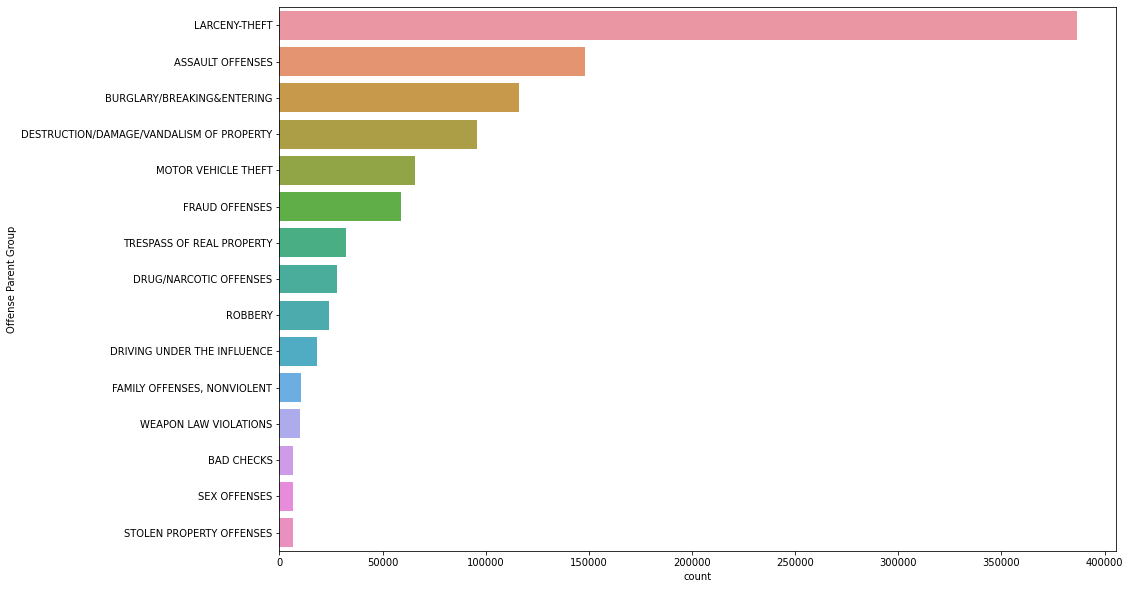

In [35]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Offense Parent Group', data = seattle_data_2, order = seattle_data_2['Offense Parent Group'].value_counts().iloc[:15].index)

In [36]:
seattle_data_2.resample('Y').size()

ReportDateTime
2008-12-31    64420
2009-12-31    65392
2010-12-31    63309
2011-12-31    59254
2012-12-31    58852
2013-12-31    63615
2014-12-31    69568
2015-12-31    67869
2016-12-31    70380
2017-12-31    73084
2018-12-31    75295
2019-12-31    70731
2020-12-31    76695
2021-12-31    71527
2022-12-31    75137
2023-12-31     8287
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

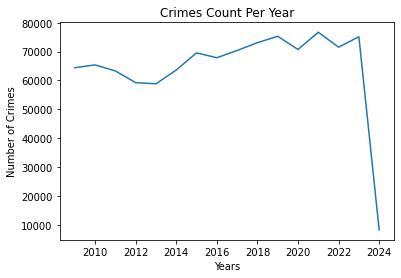

In [37]:
plt.plot(seattle_data_2.resample('Y').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

In [38]:
seattle_data_2.resample('M').size()

ReportDateTime
2008-01-31    4963
2008-02-29    4780
2008-03-31    5090
2008-04-30    4915
2008-05-31    5338
              ... 
2022-10-31    6293
2022-11-30    5651
2022-12-31    5484
2023-01-31    5752
2023-02-28    2535
Freq: M, Length: 182, dtype: int64

Text(0, 0.5, 'Number of Crimes')

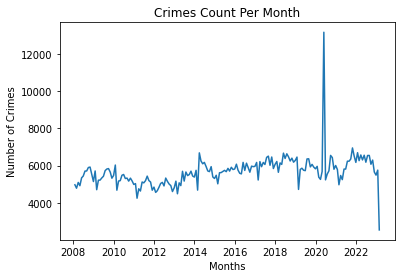

In [39]:
plt.plot(seattle_data_2.resample('M').size())
plt.title('Crimes Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

MAKE PREDICTIONS

sorting and groupby

In [81]:
parent_count = seattle_data_2['Offense Parent Group'].value_counts()
parent_count_series = seattle_data_2.groupby(['Offense Parent Group', 'month', 'year'])['Report Number'].count()
sorted_parent_count_series = parent_count_series.sort_values(ascending=False)
sorted_parent_count_series

Offense Parent Group      month  year
FRAUD OFFENSES            5      2020    8003
LARCENY-THEFT             10     2021    2785
                          4      2022    2637
                          1      2022    2630
                          4      2014    2581
                                         ... 
HUMAN TRAFFICKING         6      2020       1
SEX OFFENSES, CONSENSUAL  1      2011       1
                                 2012       1
HUMAN TRAFFICKING         7      2020       1
PROSTITUTION OFFENSES     12     2020       1
Name: Report Number, Length: 4785, dtype: int64

In [79]:
sorted_parent_count_series = sorted_parent_count_series[['Offense Parent Group','month','year','count']]

KeyError: ignored

In [76]:
offence_count = seattle_data_2['Offense'].value_counts()
offence_count_series = seattle_data_2.groupby(['Offense', "month", "year"])['Report Number'].count()
sorted_offence_count_series = offence_count_series.sort_values(ascending=False)
sorted_offence_count_series

Offense                   month  year
Identity Theft            5      2020    7799
Theft From Motor Vehicle  1      2010    1403
                          4      2014    1352
                          11     2015    1351
Impersonation             3      2014    1309
                                         ... 
Betting/Wagering          11     2008       1
Statutory Rape            1      2013       1
Betting/Wagering          10     2011       1
                          9      2021       1
Incest                    11     2013       1
Name: Report Number, Length: 7909, dtype: int64

prepare dataset

In [54]:
seattle_prophet = seattle_data_2.resample('M').size().reset_index()
seattle_prophet

,ReportDateTime,0
0,2008-01-31,4963
1,2008-02-29,4780
2,2008-03-31,5090
3,2008-04-30,4915
4,2008-05-31,5338
...,...,...
177,2022-10-31,6293
178,2022-11-30,5651
179,2022-12-31,5484
180,2023-01-31,5752


In [ ]:
seattle_prophet.columns = ['Date', 'Crime Count']
seattle_prophet_df = pd.DataFrame(seattle_prophet)

In [78]:
seattle_prophet.columns = ['type', 'year', 'month', 'count']
seattle_prophet_df = pd.DataFrame(sorted_parent_count_series)

ValueError: ignored

In [52]:
seattle_prophet_df_final = seattle_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})
seattle_prophet_df_final

,ds,y
0,2008-01-31,4963
1,2008-02-29,4780
2,2008-03-31,5090
3,2008-04-30,4915
4,2008-05-31,5338
...,...,...
177,2022-10-31,6293
178,2022-11-30,5651
179,2022-12-31,5484
180,2023-01-31,5752


In [45]:
m = Prophet()
m.fit(seattle_prophet_df_final)
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [46]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-01-31,5225.423956,4520.149615,6037.903527,5225.423956,5225.423956,46.514034,46.514034,46.514034,46.514034,46.514034,46.514034,0.0,0.0,0.0,5271.937990
1,2008-02-29,5225.713533,3985.710340,5526.281433,5225.713533,5225.713533,-528.118898,-528.118898,-528.118898,-528.118898,-528.118898,-528.118898,0.0,0.0,0.0,4697.594635
2,2008-03-31,5226.023081,4032.360992,5524.474455,5226.023081,5226.023081,-464.717944,-464.717944,-464.717944,-464.717944,-464.717944,-464.717944,0.0,0.0,0.0,4761.305137
3,2008-04-30,5226.322643,4014.764602,5537.817991,5226.322643,5226.322643,-423.663486,-423.663486,-423.663486,-423.663486,-423.663486,-423.663486,0.0,0.0,0.0,4802.659157
4,2008-05-31,5226.632191,5807.911617,7294.068397,5226.632191,5226.632191,1323.146989,1323.146989,1323.146989,1323.146989,1323.146989,1323.146989,0.0,0.0,0.0,6549.779181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2023-05-25,6163.367802,-6097.323994,-4538.570958,6162.912746,6163.550746,-11500.684414,-11500.684414,-11500.684414,-11500.684414,-11500.684414,-11500.684414,0.0,0.0,0.0,-5337.316613
268,2023-05-26,6163.441193,-4471.599353,-2913.077968,6162.977160,6163.629511,-9868.586096,-9868.586096,-9868.586096,-9868.586096,-9868.586096,-9868.586096,0.0,0.0,0.0,-3705.144902
269,2023-05-27,6163.514585,-2669.918961,-1165.336761,6163.008294,6163.719023,-8097.273925,-8097.273925,-8097.273925,-8097.273925,-8097.273925,-8097.273925,0.0,0.0,0.0,-1933.759340
270,2023-05-28,6163.587977,-813.995428,696.558383,6163.031018,6163.806165,-6214.207049,-6214.207049,-6214.207049,-6214.207049,-6214.207049,-6214.207049,0.0,0.0,0.0,-50.619071


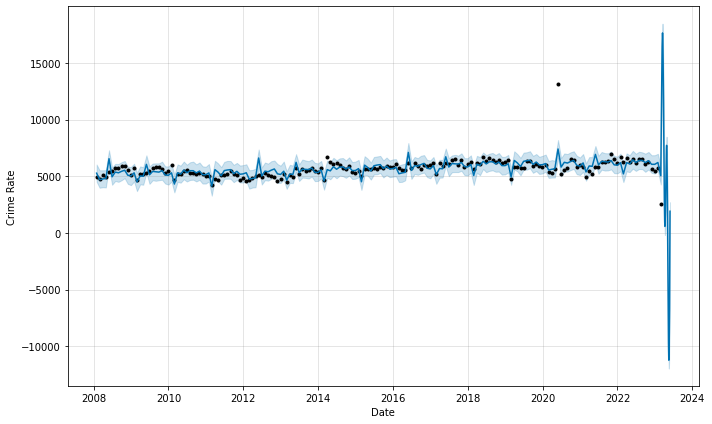

In [47]:
figure = m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

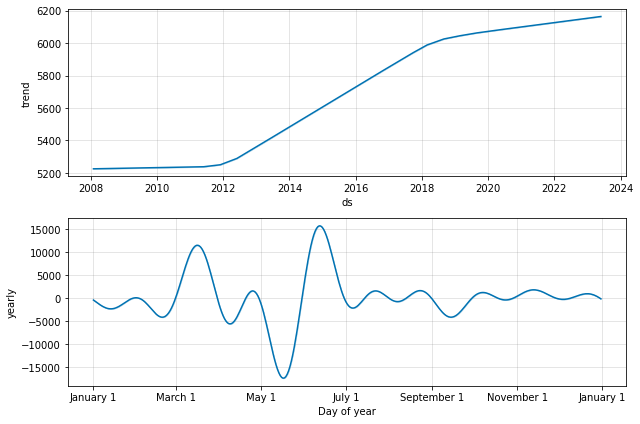

In [48]:
figure3 = m.plot_components(forecast)